# Vegetable Price Prediction Using Machine Learning
Implemented for West Bengal, Kolkata district, Bara Bazar market (Commodity = Onion) 

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import time
%matplotlib inline

# Reading Dataset
Vegetable Data is taken from https://agmarknet.gov.in

In [8]:
vegetables = pd.read_csv('West_Bengal.csv')
vegetables.head()

,Sl no.,District Name,Market Name,Commodity,Variety,Grade,Min Price (Rs./Quintal),Max Price (Rs./Quintal),Modal Price (Rs./Quintal),Price Date
0,1,Jalpaiguri,Alipurduar,Potato,Red,FAQ,2185,2210,2200,30-Dec-19
1,2,Jalpaiguri,Alipurduar,Potato,Jyoti,FAQ,1785,1810,1800,30-Dec-19
2,3,Jalpaiguri,Alipurduar,Potato,Red,FAQ,2185,2210,2200,26-Dec-19
3,4,Jalpaiguri,Alipurduar,Potato,Jyoti,FAQ,1785,1810,1800,26-Dec-19
4,5,Jalpaiguri,Alipurduar,Potato,Red,FAQ,2185,2210,2200,24-Dec-19


# Drop Unnecessary Colums
Sl no, Commodity, Grade are not  useful so drop it

In [9]:
vegetables = vegetables.drop(['Sl no.','Commodity','Grade'], axis = 1)

# Data Selection

select District Name == Kolkata <br>
Select Market Name == Bara Bazar (Posta Bazar) <br>
Then Select Variety == Jyoti

In [10]:
vegetables = vegetables[vegetables['District Name'] == "Kolkata"]
vegetables = vegetables[vegetables['Market Name'] == "Bara Bazar (Posta Bazar)"]
vegetables = vegetables[vegetables['Variety'] == "Other"]
vegetables.head()

,District Name,Market Name,Variety,Min Price (Rs./Quintal),Max Price (Rs./Quintal),Modal Price (Rs./Quintal),Price Date
1551,Kolkata,Bara Bazar (Posta Bazar),Other,2100,2120,2100,31-Dec-19
1553,Kolkata,Bara Bazar (Posta Bazar),Other,2100,2120,2100,30-Dec-19
1555,Kolkata,Bara Bazar (Posta Bazar),Other,2100,2120,2100,27-Dec-19
1557,Kolkata,Bara Bazar (Posta Bazar),Other,2160,2180,2160,26-Dec-19
1559,Kolkata,Bara Bazar (Posta Bazar),Other,2230,2240,2240,24-Dec-19


In [11]:
vegetables['Price Date'] = pd.to_datetime(vegetables['Price Date'])
vegetables['Price Date'] = vegetables['Price Date'].dt.day
vegetables = vegetables.iloc[::-1]
vegetables.tail(10)

,District Name,Market Name,Variety,Min Price (Rs./Quintal),Max Price (Rs./Quintal),Modal Price (Rs./Quintal),Price Date
1570,Kolkata,Bara Bazar (Posta Bazar),Other,1780,1800,1800,16
1568,Kolkata,Bara Bazar (Posta Bazar),Other,1840,1850,1840,17
1566,Kolkata,Bara Bazar (Posta Bazar),Other,2050,2060,2050,18
1563,Kolkata,Bara Bazar (Posta Bazar),Other,2050,2125,2100,20
1561,Kolkata,Bara Bazar (Posta Bazar),Other,1180,1190,1180,23
1559,Kolkata,Bara Bazar (Posta Bazar),Other,2230,2240,2240,24
1557,Kolkata,Bara Bazar (Posta Bazar),Other,2160,2180,2160,26
1555,Kolkata,Bara Bazar (Posta Bazar),Other,2100,2120,2100,27
1553,Kolkata,Bara Bazar (Posta Bazar),Other,2100,2120,2100,30
1551,Kolkata,Bara Bazar (Posta Bazar),Other,2100,2120,2100,31


# Reading Climate Data
Weather Data is taken from https://www.wunderground.com/ 

In [12]:
climate = pd.read_csv('climate_Kolkata_potato_210.csv')
vegetables.reset_index(inplace=True)
vegetables[['Temp_Max', 'Temp_Avg', 'Temp_Min', 'Dew_Max', 'Dew_Avg', 'Dew_Min', 'Humid_Max', 'Humid_Avg','Humid_Min','Wind_Max','Wind_Avg','Wind_Min','Pressure_Avg','Precipitation_Total']] = climate[['Temp_Max', 'Temp_Avg', 'Temp_Min', 'Dew_Max', 'Dew_Avg', 'Dew_Min', 'Humid_Max', 'Humid_Avg','Humid_Min','Wind_Max','Wind_Avg','Wind_Min', 'Pressure_Avg', 'Precipitation_Total']]
print(vegetables.head())
data = vegetables[['Price Date', 'Modal Price (Rs./Quintal)', 'Temp_Max', 'Temp_Avg', 'Temp_Min', 'Dew_Max', 'Dew_Avg', 'Dew_Min', 'Humid_Max', 'Humid_Avg','Humid_Min','Wind_Max','Wind_Avg','Wind_Min','Pressure_Avg', 'Precipitation_Total']] 
X = vegetables[['Price Date','Temp_Max', 'Temp_Avg', 'Temp_Min', 'Dew_Max', 'Dew_Avg', 'Dew_Min', 'Humid_Max', 'Humid_Avg','Humid_Min','Wind_Max','Wind_Avg','Wind_Min', 'Pressure_Avg', 'Precipitation_Total']]
y = vegetables[['Modal Price (Rs./Quintal)']]
print(X.shape)

   index District Name               Market Name Variety  \
0   2063       Kolkata  Bara Bazar (Posta Bazar)   Other   
1   2061       Kolkata  Bara Bazar (Posta Bazar)   Other   
2   2059       Kolkata  Bara Bazar (Posta Bazar)   Other   
3   2057       Kolkata  Bara Bazar (Posta Bazar)   Other   
4   2055       Kolkata  Bara Bazar (Posta Bazar)   Other   

   Min Price (Rs./Quintal)  Max Price (Rs./Quintal)  \
0                      500                      520   
1                      500                      520   
2                      500                      520   
3                      500                      510   
4                      500                      520   

   Modal Price (Rs./Quintal)  Price Date   Temp_Max   Temp_Avg  ...  \
0                        520           1  88.680952  80.242857  ...   
1                        520           2  88.595238  80.129524  ...   
2                        500           3  88.490476  80.009048  ...   
3                       

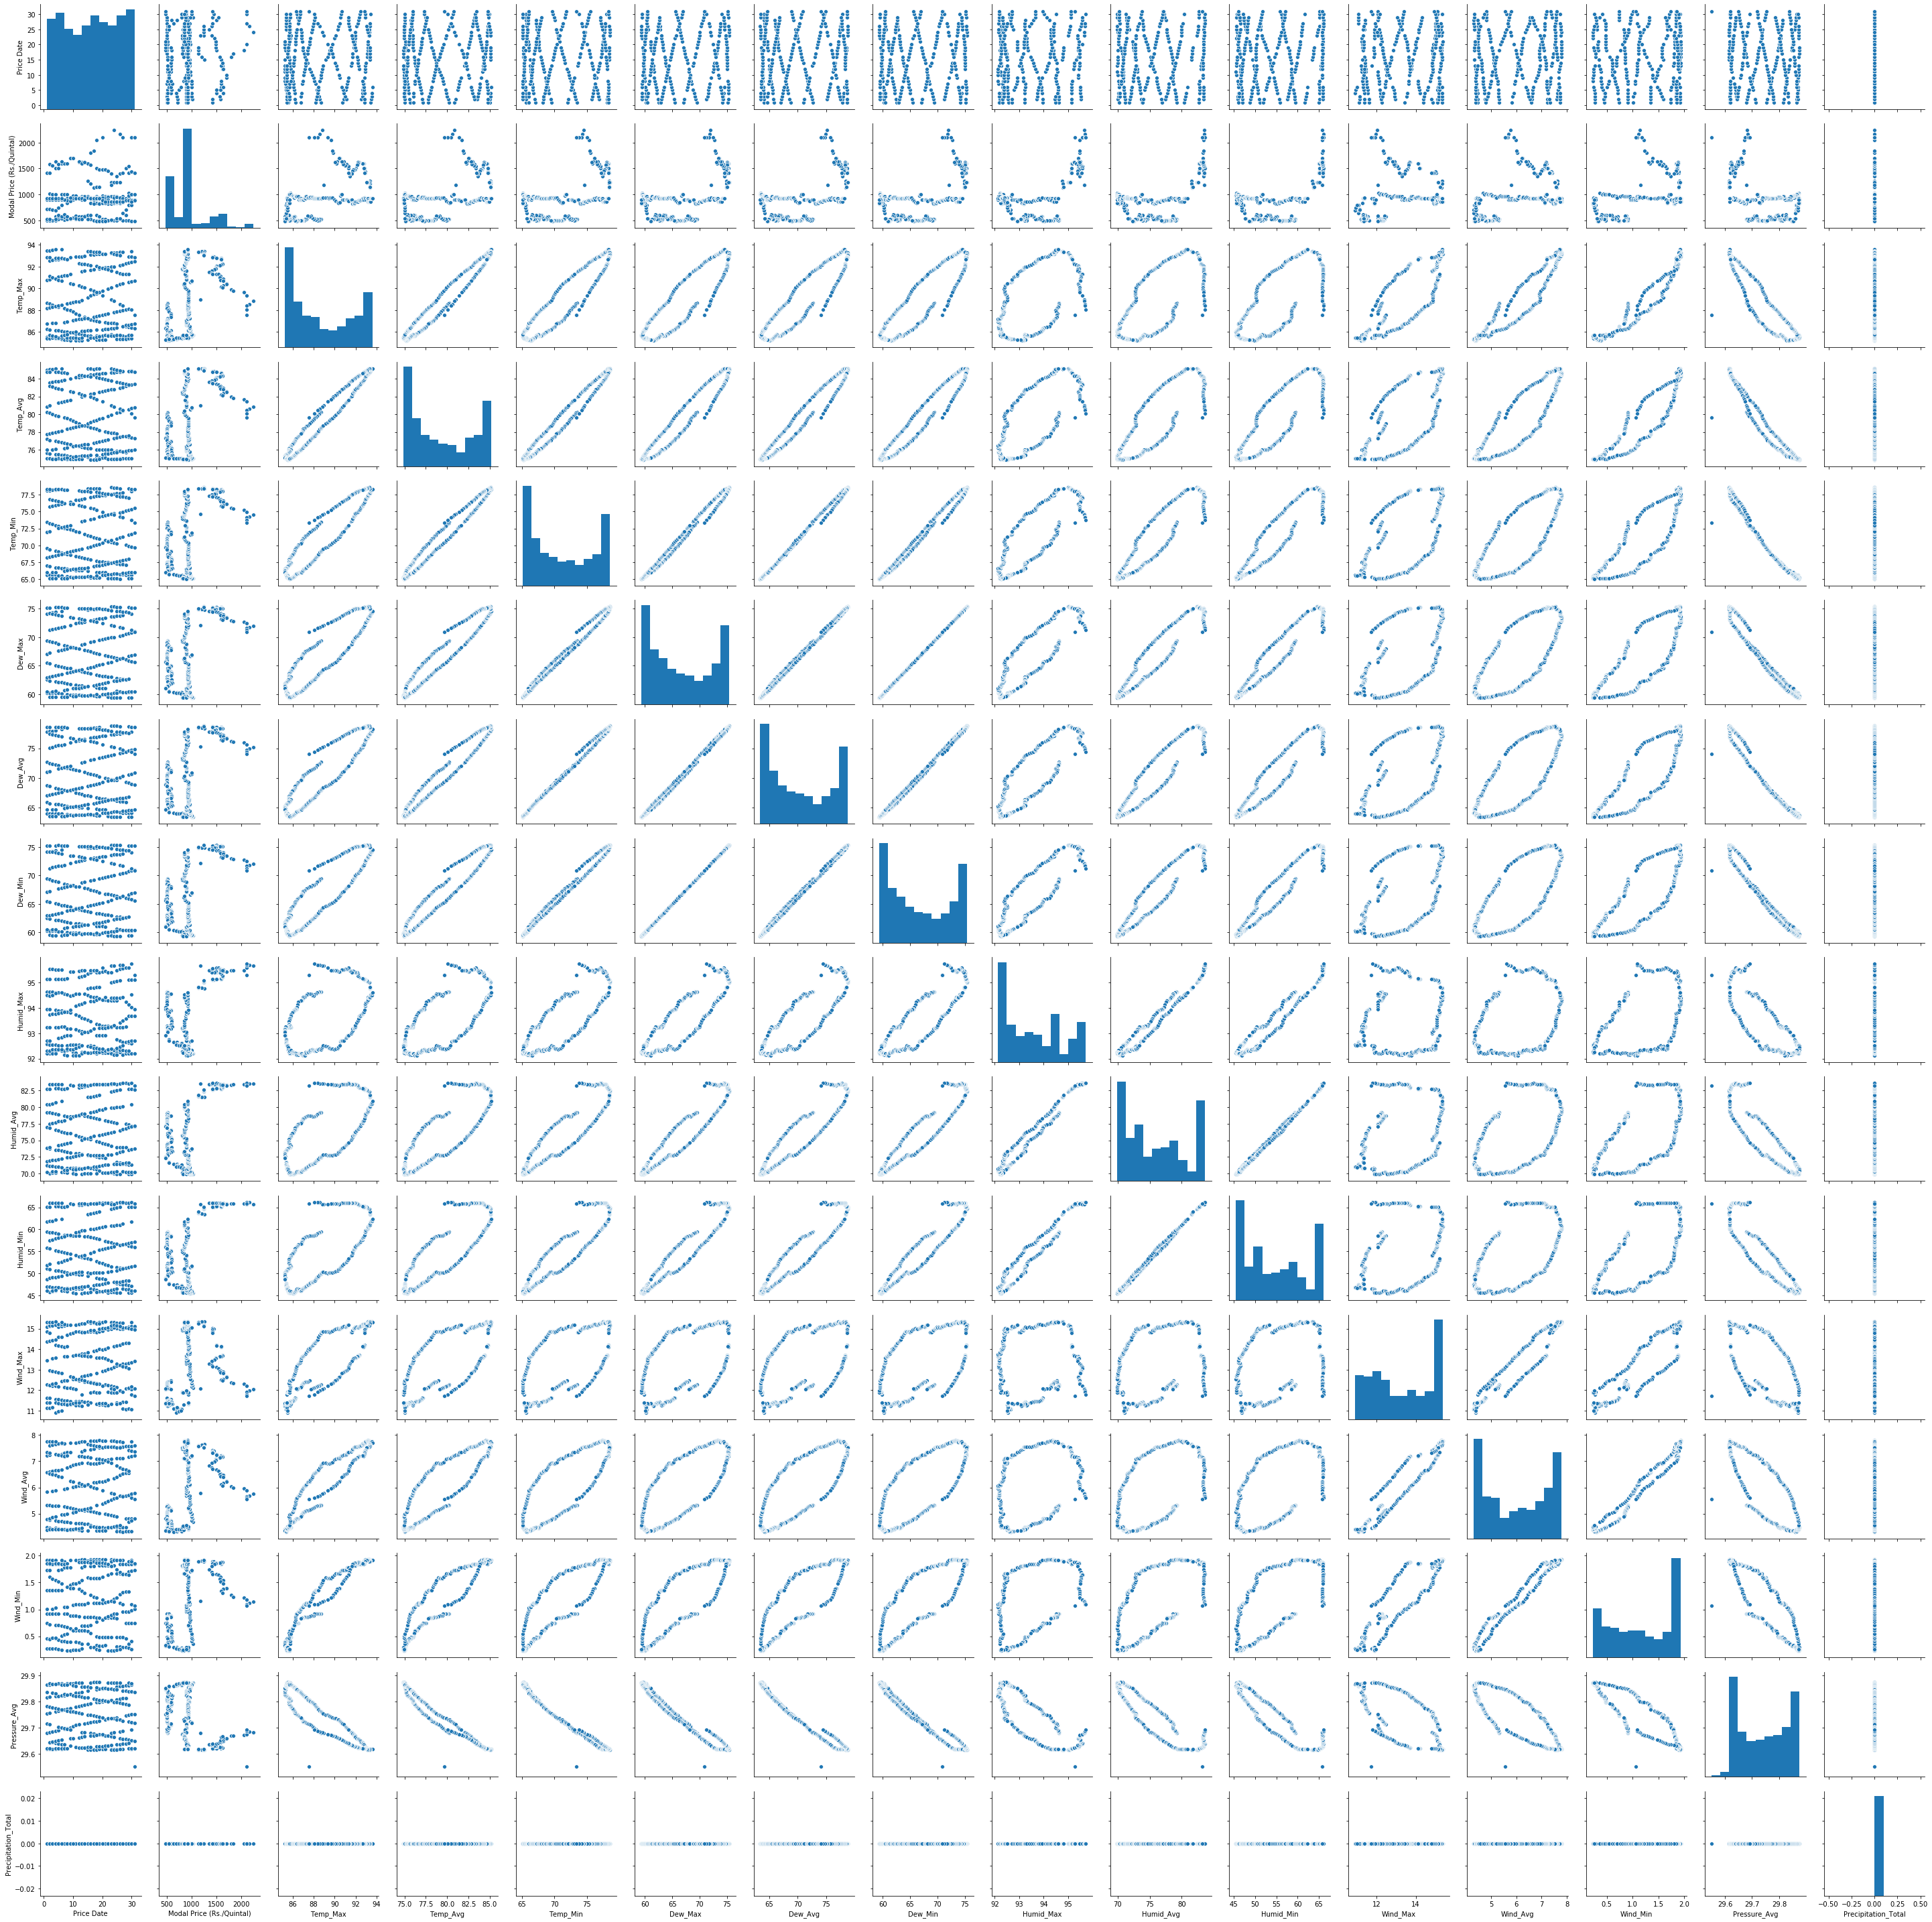

In [13]:
sns.pairplot(data)

# Data is splitted into train and test set.

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
import math

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X[:-1], y[:-1], test_size=0.3, random_state=42, shuffle = True)

# Implementation Of Algorithm 
Implementing Random Forest algorithm

In [16]:
start = time.time()
regr = RandomForestRegressor(n_estimators = 140,max_depth=300, random_state=42, criterion="mae", min_samples_split=2, oob_score = True)
regr.fit(X_train,np.reshape(np.array(y_train), (len(y_train), )))
end = time.time()
print(f"Runtime of the program is {end - start}")

Runtime of the program is 1.8164398670196533


In [ ]:
predicted = regr.predict(X_test)

# Accuracy For Training and Testing Set

In [ ]:
#print(y_test, predicted)
print(regr.score(X_train, y_train))
print(regr.score(X_test, y_test))

# Feature Importance

In [ ]:
a = np.reshape(regr.feature_importances_, (len(regr.feature_importances_),1))
a = a.tolist()
col = X.columns
for i in range(0,15):
    print(col[i],  "->" , a[i][0])

# predicted vs Actual

In [ ]:
b= y_test.values
b = b.reshape((len(b),))
l = len(b)
sum_a = 0
for i in range(len(predicted)):
    print(str(predicted[i]) +"->"+ str(b[i]))
    sum_a = sum_a + abs(predicted[i] - b[i])

In [ ]:
print(sum_a/l)

# Create picke file

In [ ]:
import pickle
filename = 'Kolkata_potato'
outfile = open(filename,'wb')
pickle.dump(regr,outfile)
outfile.close()

In [ ]:
filename = 'Kolkata_potato'
with open(filename, "rb") as f:
    rf = pickle.load(f)
predicted = rf.predict(X)
actual= np.reshape(np.array(y),(len(y),))
#print(predicted,actual)
sum = 0
for i in range(len(predicted)):
    #print(str(actual[i]) + "->" + str(predicted[i]))
    sum = sum +abs(actual[i] - predicted[i])
f.close()

# Total Error

In [ ]:
print(sum/len(actual)) 